## Demo 5 - Independent generators in the genus-2 surface

In [1]:
from dreimac import GeometryExamples
from dreimac import CircleMapUtils as CMU
from persim import plot_diagrams

import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = GeometryExamples.genus_two_surface()
data += 0.2*np.random.randn(*data.shape)

# Plot the data 
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode ='markers', 
    marker=dict(size = 1.5 , color = 'grey'))])

fig.update_layout(scene=dict(aspectmode='data'))
fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False))
fig.show()


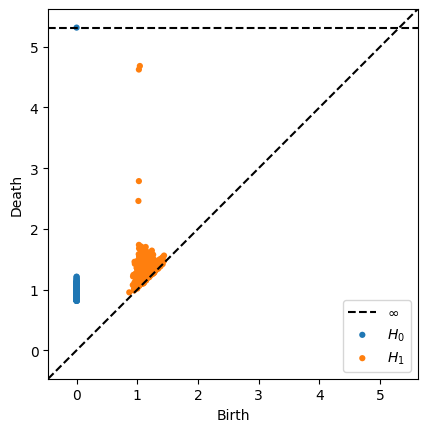

In [3]:
from dreimac import CircularCoords

n_lands = 800

cc = CircularCoords(data, n_landmarks=n_lands)
plot_diagrams(cc.dgms_)

In [6]:
coho_classes = [0, 1, 2, 3]

circular_coords = []

for i in coho_classes:
    circular_coords.append(cc.get_coordinates(cocycle_idx=i, standard_range = True))
    
print(circular_coords)
print(len(circular_coords))

[array([5.31851532, 5.27372949, 5.21581816, ..., 6.00436623, 5.99103743,
       5.99292866]), array([5.21264382, 5.26178925, 5.29311716, ..., 2.56877076, 2.65950422,
       2.6469791 ]), array([2.41105151, 2.8881076 , 2.75125661, ..., 1.46695345, 1.50776973,
       1.51527218]), array([3.52440351, 3.73281963, 3.66182893, ..., 5.49351722, 5.38256856,
       5.39257306])]
4


In [ ]:
fig = make_subplots(rows=1, cols=len(coho_classes), 
                    subplot_titles = tuple('Circ Coord '+str(i) for i in coho_classes),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes]])

for i, coord in enumerate(circular_coords):
    fig.add_trace(
        go.Scatter3d(x=data.T[0], y=data.T[1], z=data.T[2],   mode ='markers', 
        marker=dict(size = 2 , color = CMU.to_sinebow(np.pi + CMU.center(circular_coords[i])))),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)

fig.update_layout( showlegend=False )
fig.show()

## Toroidal Coordinates
_Decorrelating Circular Coordinates With Lattice Reduction_

L. Scoccola, H. Gakhar, J. Bush, N. Schonsheck, T. Rask, L. Zhou, J. Perea, **SoCG 2023**

In [ ]:
from dreimac import ToroidalCoords
tc = ToroidalCoords(data, n_landmarks=n_lands)
toroidal_coords = tc.get_coordinates(cocycle_idxs=coho_classes)

In [ ]:
tc.change_basis_

In [ ]:
fig = make_subplots(rows=1, cols=len(coho_classes), 
                    subplot_titles = tuple('Toro Coord '+str(i) for i in coho_classes),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes]])

for i, coord in enumerate(toroidal_coords):
    fig.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2],   mode ='markers', 
        marker=dict(size = 2 , color =  CMU.to_sinebow(np.pi + CMU.center(toroidal_coords[i])))),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)


fig.update_layout( showlegend=False )
fig.show()